In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/water_potability.csv")
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
df=df.dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [8]:
cols=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

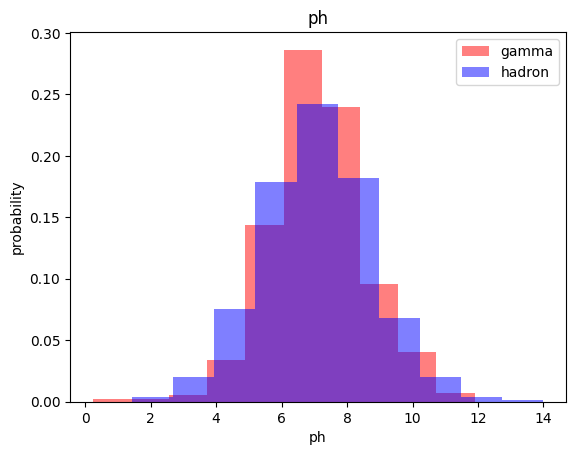

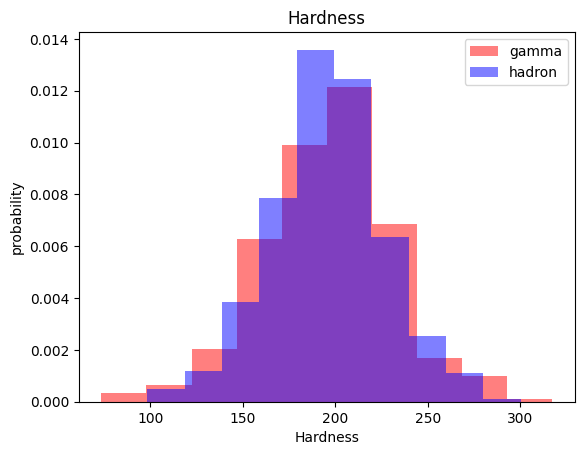

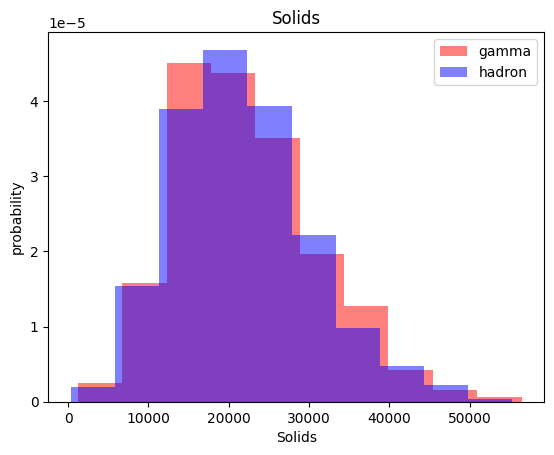

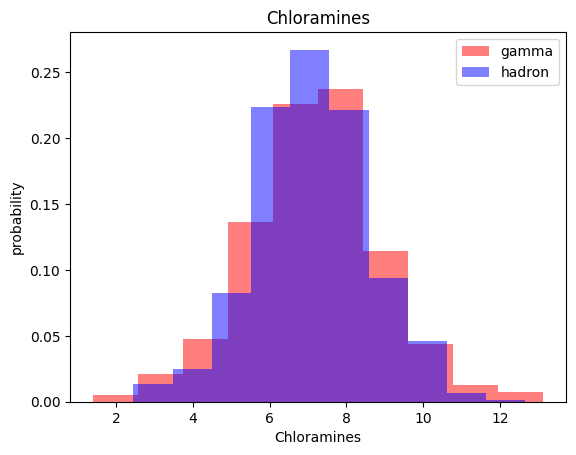

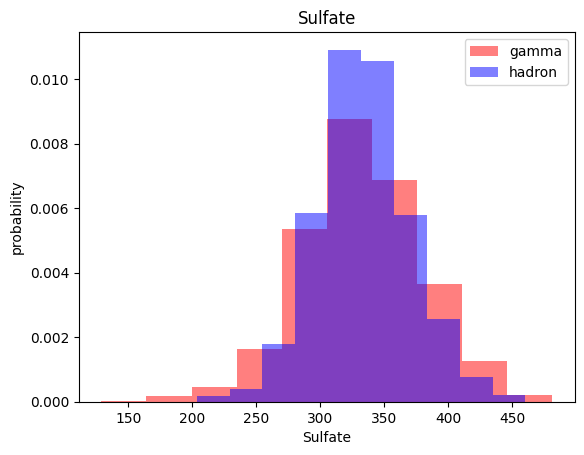

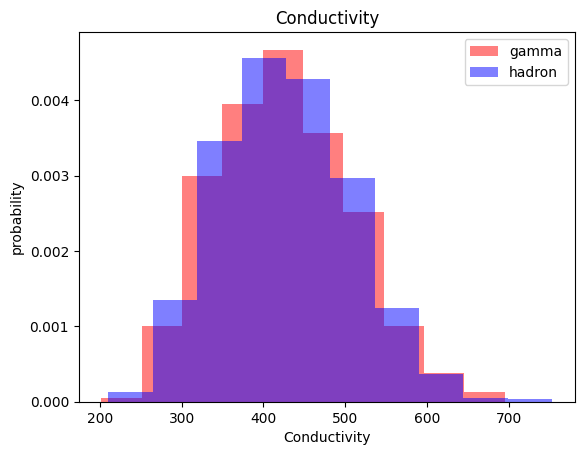

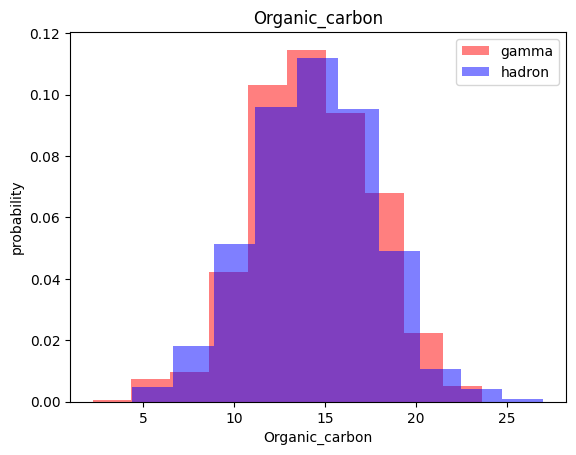

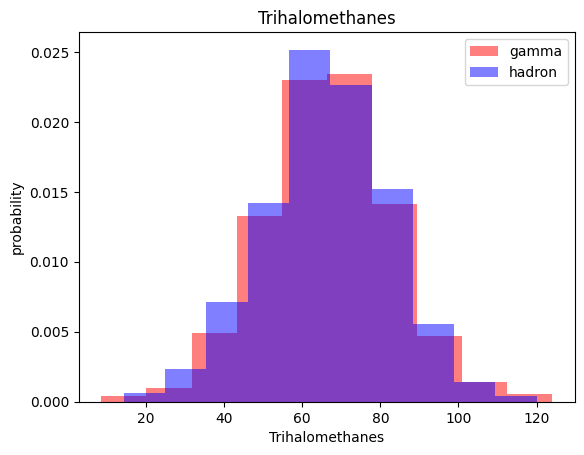

In [9]:
for label in cols[:-1]:
    plt.hist(df[df['Potability'] == 1][label],color = 'red',label = 'gamma',alpha = 0.5,density = True)
    plt.hist(df[df['Potability'] == 0][label],color = 'blue',label = 'hadron',alpha = 0.5,density = True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [11]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [12]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [13]:

print(train)


[[-1.31217116 -0.50661026  0.03566391 ...  0.96878056 -0.83251018
   0.        ]
 [-1.53926217  0.78223339  0.22239165 ... -0.41919619  0.03851425
   0.        ]
 [ 1.61966198  1.08384318 -1.997847   ...  0.74871475 -1.20420225
   0.        ]
 ...
 [-1.37270591 -1.32251905 -0.2398221  ...  0.10826358 -0.13939597
   1.        ]
 [-0.28532863  0.19289775 -0.91790564 ... -0.1448716  -0.07518211
   1.        ]
 [ 0.46276194 -0.50360991 -0.58749053 ...  0.93896339  0.23985743
   1.        ]]


In [14]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1466
1466
403
403


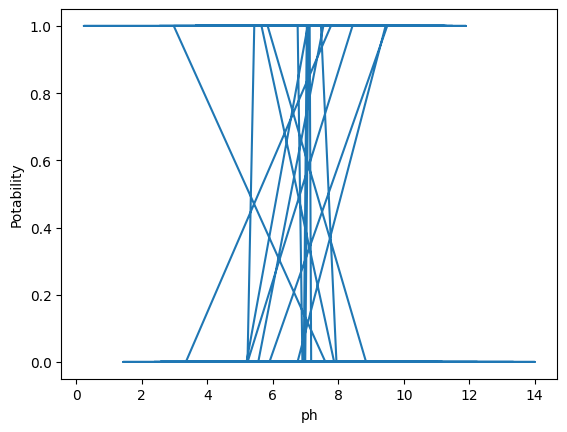

In [15]:
x2 = df['ph']
y = df['Potability']
import matplotlib .pyplot as plt
plt.xlabel('ph')
plt.ylabel('Potability')
plt.plot(x2,y)
plt.show()

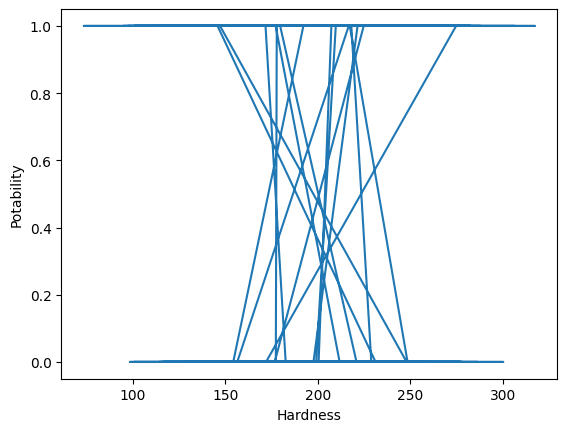

In [16]:
x2 = df['Hardness']
y = df['Potability']
import matplotlib .pyplot as plt
plt.xlabel('Hardness')
plt.ylabel('Potability')
plt.plot(x2,y)
plt.show()

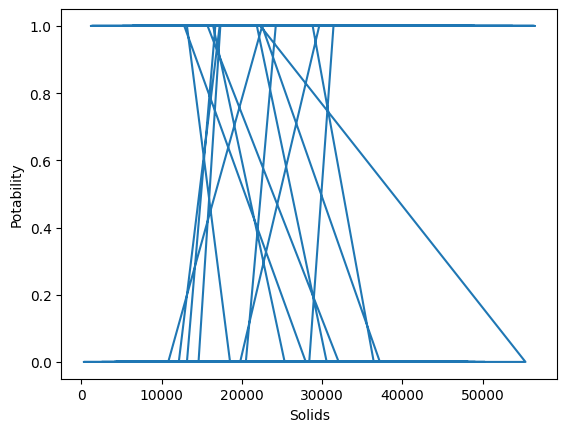

In [17]:
x2 = df['Solids']
y = df['Potability']
import matplotlib .pyplot as plt
plt.xlabel('Solids')
plt.ylabel('Potability')
plt.plot(x2,y)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np
yp=[]
 #implementing perceptron model
def perceptron(w,x1,b):
  q=0
  for i in range(len(x1)):
    for j in range(len(w)):
      s=(x1[i][j]*w[j])+b
      s2=1/(1+np.exp(-s))
      if(s2>=0.5):
        yp.append(1)
      else:
        yp.append(0)
    q=q+1
  print(q)
  return yp
w=[]
#print("enter weights w : ")
w=[0.3,0.2,0.6,0.1,0.2,0.6,0.8,0.6,0.25]
b= float(input("enter b:"))
perceptron(w,X_train,b)

enter b:102
1466


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [19]:
# Assuming you have the true labels for your data
# Assuming you have the true labels for your data
#true_labels = [1, 0, 1]  # Replace with your actual true labels

# Calculate accuracy
predictions = sum(1 for y, yp in zip(y, yp) if y == yp)
total_predictions = len(y)
accuracy = predictions / total_predictions

print("Accuracy:" ,accuracy)



Accuracy: 0.4032819492789657


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
yp=[]
 #implementing perceptron model

def perceptron(w,x1,b):
    q=0
    for i in range(len(x1)):
       for j in range(len(w)):
          s=(x1[i][j]*w[j])+b
          s2=1/(1+np.exp(-s))
          if(s2>=0.5):
             yp.append(1)
          else:
             yp.append(0)
    q=q+1
    return yp
accuracy_list = []
#print("enter weights w : ")
num_iter = 8
import random
for i in range(num_iter):
    w = []
    yp=[]
    for j in range(9):
        val = random.uniform(0.0,1.0)
        w.append(val)
        #print(w)
    b = random.uniform(0.0,1.0)
    yp = perceptron(w,X_train,b)
    print(yp)
    predictions = sum(1 for y, yp in zip(y, yp) if y == yp)
    total_predictions = len(y)
    accuracy = predictions / total_predictions
    print(accuracy)
    accuracy_list.append(accuracy)



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 

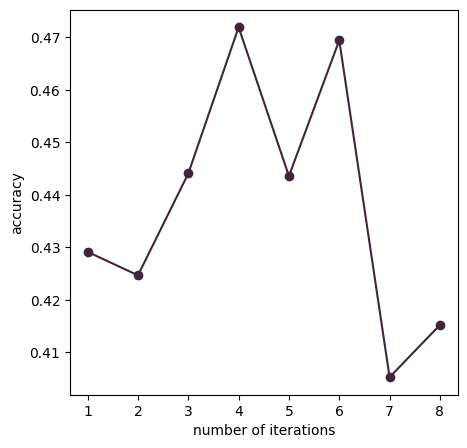

In [21]:
num_iterations= [1,2,3,4,5,6,7,8]
plt.figure( figsize = ( 5,5 ) )
plt.xlabel("number of iterations")
plt.ylabel("accuracy")
# Accuracy scores plot obtained from above iterations
plt.plot(num_iterations, accuracy_list, label = 'Accuracy', marker = 'o', color = '#42253B')

# New Section

In [22]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Create a Perceptron instance and fit the training data
clf = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
print(y_pred)
# Calculate the accuracy of the model
accuracy_PM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_PM)

[0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1
 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1
 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0
 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1
 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0]
Accuracy: 0.5037220843672456


In [23]:
import numpy as np
costs_list = []
num_iter = []
# implementation of logistic regression from scratch without any libraries
class Logisticregression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = X.shape[0]
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw = (1 / m) * np.dot(X.T, (h - y))
            db = (1 / m) * np.sum(h - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            cost = self.cost_function(X, y)
            self.cost_history.append(cost)
            if i % 100 == 0:
                cost = self.cost_function(X, y)
                print(f"Cost after iteration {i}: {cost}")

        print("",self.cost_history)


    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred = np.where(h > 0.5, 1, 0)
        return y_pred


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

model = Logisticregression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cost after iteration 0: 0.6931151843186657
Cost after iteration 100: 0.6905910462221386
Cost after iteration 200: 0.6890355291478583
Cost after iteration 300: 0.6880688716288463
Cost after iteration 400: 0.6874632306053997
Cost after iteration 500: 0.687080906210652
Cost after iteration 600: 0.6868379155389271
Cost after iteration 700: 0.6866825515674965
Cost after iteration 800: 0.6865826899568115
Cost after iteration 900: 0.6865182060173096
 [0.6931151843186657, 0.6930833450026819, 0.6930516618199097, 0.6930201339823008, 0.6929887607058226, 0.6929575412104393, 0.6929264747200922, 0.6928955604626794, 0.692864797670038, 0.6928341855779225, 0.6928037234259882, 0.6927734104577695, 0.6927432459206626, 0.6927132290659056, 0.6926833591485598, 0.6926536354274908, 0.6926240571653498, 0.692594623628555, 0.6925653340872724, 0.6925361878153978, 0.6925071840905387, 0.6924783221939946, 0.69244960141074, 0.6924210210294057, 0.6923925803422601, 0.6923642786451922, 0.6923361152376927, 0.6923080894228

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#Importing logistic regression function from scikit learn directly

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
# Evaluate the model
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy is:",accuracy_LR)
print(classification_report(y_test, y_pred))

[1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1
 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0
 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0
 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0]
Accuracy is: 0.456575682382134
              precision    recall  f1-score   support

           0       0.52      0.48      0.50       229
           1       0.38      0.42      0.4

In [26]:
#SVM INBUIKT FUNCTION
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM instance and fit the training data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)
print(y_pred)
# Calculate the accuracy of the model
accuracy_SVM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_SVM)
print(classification_report(y_test, y_pred))

[1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1
 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0
 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0]
Accuracy: 0.45161290322580644
              precision    recall  f1-score   support

           0       0.52      0.48      0.50       229
           1       0.38      0.41      0.39

In [27]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
accuracy_KNN = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy_KNN)
#print("\nClassification Report:\n", classification_report(y_test, y_pred))

[1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1
 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1
 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1
 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1]
Accuracy is : 0.5707196029776674


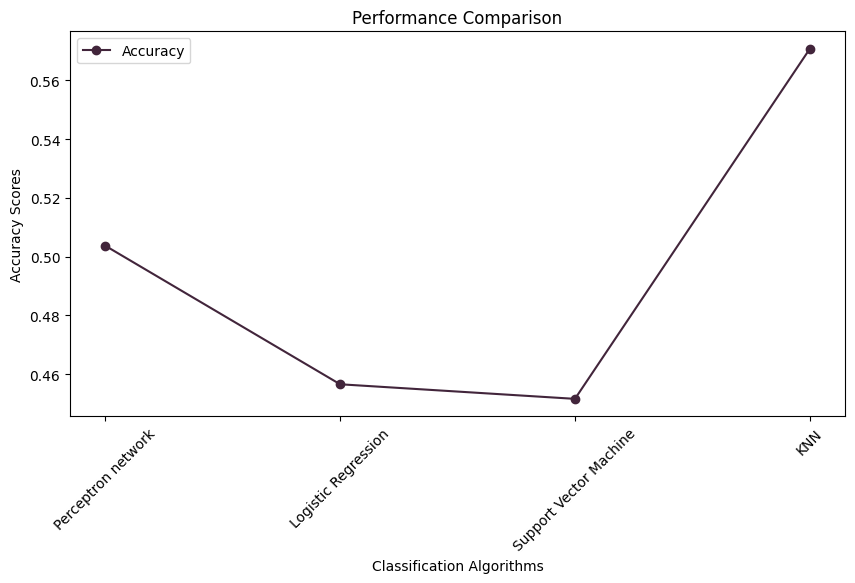

In [28]:
algorithm_names = ['Perceptron network','Logistic Regression','Support Vector Machine','KNN']
accuracy_scores = [ accuracy_PM , accuracy_LR , accuracy_SVM, accuracy_KNN ]
# Plotting the scores
plt.figure( figsize = ( 10 , 5 ) )
# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label = 'Accuracy', marker = 'o', color = '#42253B')
plt.xlabel( 'Classification Algorithms' )
plt.ylabel( 'Accuracy Scores' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show ()


[1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1
 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1]
Accuracy is : 0.5732009925558312


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
n_bootstrap_samples = 100
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

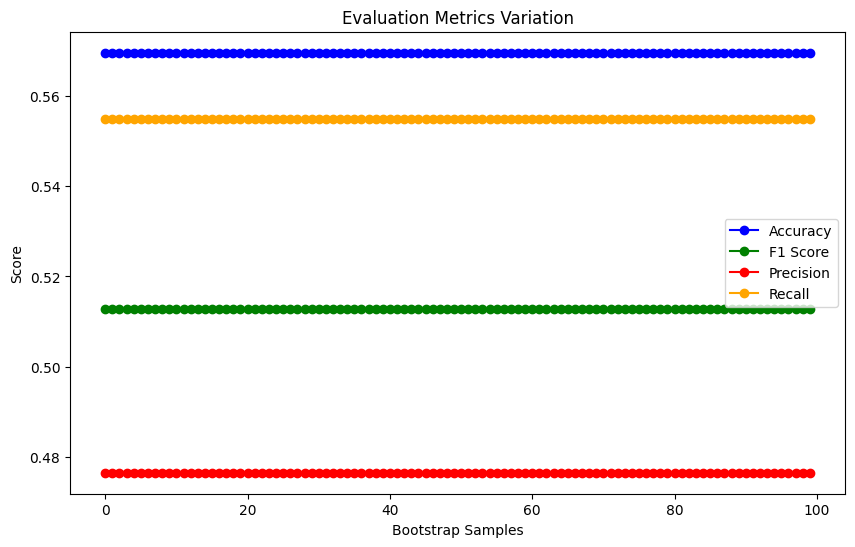

Sample 1:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 2:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 3:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 4:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 5:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 6:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 7:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 8:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 9:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 10:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 11:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 12:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 13:
Accuracy: 0.570
F1 Score: 0.513
Precision: 0.476
Recall: 0.555

Sample 14:
Accuracy: 0.570
F1 Scor

In [31]:
for _ in range(n_bootstrap_samples):

    X_bootstrap, y_bootstrap = resample(X_train, y_train, n_samples=len(X_train), random_state=42)


    knn.fit(X_bootstrap, y_bootstrap)

    y_pred = knn.predict(X_valid)


    accuracy = accuracy_score(y_valid, y_pred)
    accuracy_scores.append(accuracy)


    f1 = f1_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)


sample_indices = np.arange(n_bootstrap_samples)

plt.figure(figsize=(10, 6))

plt.plot(sample_indices, accuracy_scores, label='Accuracy', marker='o', color='blue')
plt.plot(sample_indices, f1_scores, label='F1 Score', marker='o', color='green')
plt.plot(sample_indices, precision_scores, label='Precision', marker='o', color='red')
plt.plot(sample_indices, recall_scores, label='Recall', marker='o', color='orange')

plt.xlabel('Bootstrap Samples')
plt.ylabel('Score')
plt.title('Evaluation Metrics Variation')
plt.legend()

plt.show()

for i in range(n_bootstrap_samples):
    print(f"Sample {i + 1}:")
    print(f"Accuracy: {accuracy_scores[i]:.3f}")
    print(f"F1 Score: {f1_scores[i]:.3f}")
    print(f"Precision: {precision_scores[i]:.3f}")
    print(f"Recall: {recall_scores[i]:.3f}")
    print()

In [45]:
# Import libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load data (replace 'path/to/your/data.csv' with your actual file path)
data = pd.read_csv('/content/water_potability.csv')

# Check for target column (adjust column name if necessary)
if 'water_potability' not in data.columns:
    target_col = [col for col in data.columns if col.lower() == 'potability'][0]  # Find similar named column (lowercase)
    if target_col:
        data = data.rename(columns={target_col: 'water_potability'})  # Rename if found
    else:
        # Handle missing column (e.g., remove rows with missing values using data.dropna())
        raise ValueError("Target column 'water_potability' not found in data")

# Define features and target variable
features = data.drop('water_potability', axis=1)  # Drop the target column to get features
target = data['water_potability']

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2)

# Create the Naive Bayes classifier
clf = GaussianNB()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5960365853658537


In [36]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load data (replace 'path/to/your/data.csv' with your actual file path)
data = pd.read_csv('/content/water_potability.csv')

# Check for target column (adjust column name if necessary)
if 'water_potability' not in data.columns:
    target_col = [col for col in data.columns if col.lower() == 'potability'][0]  # Find similar named column (lowercase)
    if target_col:
        data = data.rename(columns={target_col: 'water_potability'})  # Rename if found
    else:
        # Handle missing column (e.g., remove rows with missing values using data.dropna())
        raise ValueError("Target column 'water_potability' not found in data")

# Define features and target variable
features = data.columns.drop('water_potability')
target = data['water_potability']

# ... rest of the code

